In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split

import os
import cv2
import numpy as np
from PIL import Image
from dataclasses import dataclass

import matplotlib.pyplot as plt 

In [22]:
torch.round (torch.tensor ([0.55]))

tensor([1.])

In [65]:
# device = torch.device ('mps' if torch.backends.mps.is_available () and torch.backends.mps.is_built () else 'cpu')
device = torch.device ('cpu')

In [12]:
class SimpleModel (nn.Module):
    def __init__ (self):
        super (SimpleModel, self).__init__ ()
        self.net = nn.Sequential (
            nn.Linear (1, 10),
            nn.Linear (10, 1),
            nn.Sigmoid ()
        )
        
    def forward (self, x):
        out = self.net (x)
        return out

In [13]:
if not torch.backends.mps.is_available():
    if not torch.backends.mps.is_built():
        print("MPS not available because the current PyTorch install was not "
              "built with MPS enabled.")
    else:
        print("MPS not available because the current MacOS version is not 12.3+ "
              "and/or you do not have an MPS-enabled device on this machine.")

else:
    mps_device = torch.device("mps")

    # Create a Tensor directly on the mps device
    x = torch.ones(1, device=mps_device)
    # Or
    x = torch.ones(1, device="mps")

    # Any operation happens on the GPU
    y = x * 2

    # Move your model to mps just like any other device
    model = SimpleModel()
    model.to(mps_device)

    # Now every call runs on the GPU
    pred = model(x)

In [14]:
SimpleModel ().to ('mps') (torch.tensor ([1]))

RuntimeError: MPS device does not support linear for non-float inputs

In [11]:
net = nn.Sequential (
    nn.Linear (1, 10),
    nn.Linear (10, 1),
    nn.Sigmoid ()
)

In [12]:
import random

def data_gen (samples=100):
    sam = list ()
    
    for i in range (samples):
        tensor1 = torch.tensor (random.randint (0, 1))
        tensor2 = torch.tensor (0 if tensor1 == 1 else 1)
        sam.append ((tensor1, tensor2))
        
    return sam

In [13]:
one_zero_data = data_gen()
inputs = torch.stack([item[0] for item in one_zero_data])
outputs = torch.stack([item[1] for item in one_zero_data])

inputs = inputs.view(-1, 1)
outputs = outputs.view(-1, 1)

dataset = TensorDataset(inputs, outputs)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

In [10]:
criterion = nn.BCELoss ()
optimizer = optim.Adam (net.parameters (), lr=0.001)

In [168]:
epochs = 10

for epoch in range (epochs):
    
    accum_loss = 0.0
    for inps, outs in loader:
        
        inps = inps.to (torch.float)
        outs = outs.to (torch.float)
        
        optimizer.zero_grad ()
        
        pred = net (inps)
        loss = criterion (pred, outs)
        loss.backward ()
        
        optimizer.step ()

    print (f'epoch: ({epoch + 1}/epochs)')

epoch: (1/epochs)
epoch: (2/epochs)
epoch: (3/epochs)
epoch: (4/epochs)
epoch: (5/epochs)
epoch: (6/epochs)
epoch: (7/epochs)
epoch: (8/epochs)
epoch: (9/epochs)
epoch: (10/epochs)


In [169]:
inp = random.randint (0, 1)
print (f'input: {inp}')
print (f'output: {1 if net (torch.tensor ([inp]).to (torch.float)) >= 0.5 else 0}')

input: 1
output: 0


In [2]:
path = os.path.join ("vit-cat-dog", "dogs", 'dog2.jpg')
image = Image.open (path)

transform = transforms.Compose ([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

dog = transform (image)

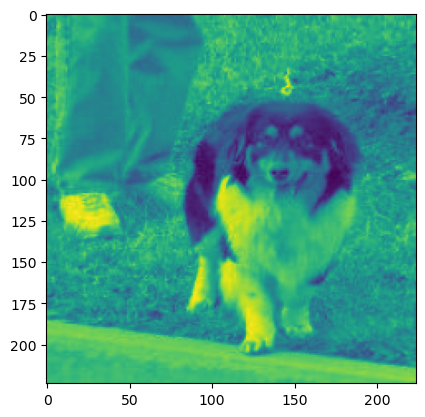

In [3]:
plt.imshow (dog.permute (1, 2, 0))

In [9]:
C, H, W = dog.shape
C, H, W

(1, 224, 224)

In [67]:
encoder_conv = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
    nn.ReLU()
)

In [71]:
out = encoder_conv (dog)
out, out.shape

(tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          ...,
          [0.0000e+00, 8.7486e-03, 0.0000e+00,  ..., 7.2850e-05,
           0.0000e+00, 0.0000e+00],
          [3.1409e-04, 2.0398e-02, 1.5445e-02,  ..., 2.0798e-02,
           0.0000e+00, 1.2086e-02],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00]],
 
         [[1.1367e-02, 7.7015e-04, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.7493e-05,
           0.0000e+00, 0.0000e+00],
          ...,
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.000

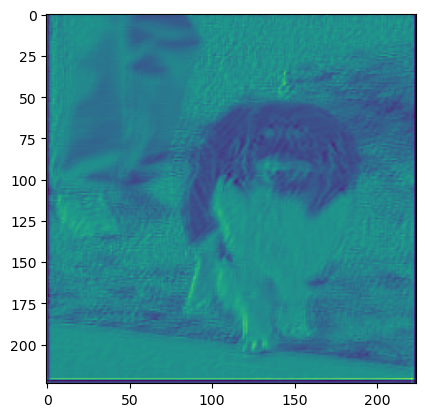

In [78]:
plt.imshow (encoder_conv (dog)[80].detach ().numpy ())

In [10]:
@dataclass
class ViTConfig:
    def __init__ (self, **kwargs):
        for k, v in kwargs.items ():
            setattr (self, k, v)
        self.d_k = self.d_model // self.n_head
        self.tok_len = self.patch_size ** 2
        
        # add one bacuause of the prediction token
        self.seq_len = int ((self.h_image * self.w_image) / self.patch_size ** 2) + 1

In [11]:
config = ViTConfig (
    n_head=4,
    n_layer=4,
    d_model=768,
    h_image=H,
    w_image=W,
    epochs=50,
    patch_size=16,
    chan_mul=4,
    batch_size=16
)

In [12]:
P = 16
N = int ((H * W) / P ** 2)

In [13]:
print (f'Number of image tokens: {N}')

Number of image tokens: 196


In [14]:
size_token = P ** 2
print (f'Length of a token: {size_token}')

Length of a token: 256


In [15]:
dog.shape

torch.Size([1, 224, 224])

In [16]:
dog = torch.squeeze (dog).squeeze (dim=-1)
patch = dog[0:16, 0:16]

In [17]:
dog.shape

torch.Size([224, 224])

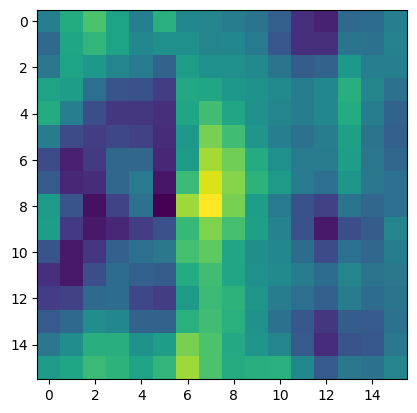

In [18]:
plt.imshow (patch)

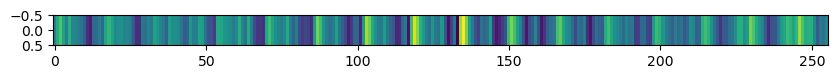

In [19]:
token = patch.reshape (-1, P ** 2)
fig = plt.figure (figsize=(10,1))
plt.imshow (token, aspect=10)

In [20]:
print (f'Each patch will make a token of length: {token.size()[1]}')

Each patch will make a token of length: 256


In [21]:
class PatchTokenizer (nn.Module):
    def __init__ (self, config: ViTConfig):
        super (PatchTokenizer, self).__init__ ()
        
        self.windows = nn.Unfold (kernel_size=config.patch_size, stride=config.patch_size, padding=0)
        
        # projection for converting into the required dimention using nn.Linear ()
        self.project = nn.Linear ((config.patch_size ** 2), config.tok_len)
    
    def forward (self, x):
        # transpose for multiplying (a, b) with (b, a)
        x = self.windows (x).transpose (1, 2)
        x = self.project (x)
        return x

In [22]:
x = dog
x.shape # torch.Size ([H, W])

torch.Size([224, 224])

In [23]:
# nn.Unfold, expects torch.Size ([N, C, H, W]) (Batch, Channels, Height, Width)
x = x.unsqueeze (0).unsqueeze (0).to (torch.float32)
x.shape # torch.Size ([N, C, H, W])

torch.Size([1, 1, 224, 224])

In [24]:
token_len = P ** 2
prediction_token = nn.Parameter (torch.zeros (1, 1, token_len))

# prediction token of size 256, because of the projection
prediction_token.shape

torch.Size([1, 1, 256])

In [25]:
x.shape

torch.Size([1, 1, 224, 224])

In [26]:
# concatinate the tokens with the prediction token at the beginning

# get all the tokens from the given image
tokenizer = PatchTokenizer (config)
tokens = tokenizer (x)

# torch.Size ([batch, tokens, token_length])
print (tokens.shape)

# torch.Size (1, 197, 256)
x = torch.cat ((prediction_token, tokens), dim=1)

torch.Size([1, 196, 256])


In [27]:
nn.Linear (256, 1)(x.squeeze ()[0])

tensor([-0.0325], grad_fn=<ViewBackward0>)

In [28]:
B, T, L = x.shape
B, T, L

(1, 197, 256)

In [29]:
# learnable positional encoding

class LearnablePositionalEncoder (nn.Module):
    def __init__ (self, config: ViTConfig):
        super (LearnablePositionalEncoder, self).__init__ ()
        self.pos_encoding = nn.Parameter (torch.zeros (1, config.seq_len, config.tok_len))
    
    def forward (self, x):
        out = self.pos_encoding + x
        return out

In [30]:
x.shape

torch.Size([1, 197, 256])

In [31]:
nn.Parameter (torch.zeros (1, T, config.d_model)).shape

torch.Size([1, 197, 768])

In [32]:
pos_encoder = LearnablePositionalEncoder (config)
pos_encoder (x) # torch.Size ([1, 197, 768])

tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.3647,  0.0647, -0.2288,  ...,  0.2000, -0.4316, -0.1346],
         [ 0.3996,  0.1285, -0.2117,  ...,  0.1108, -0.4170, -0.0269],
         ...,
         [ 0.5336,  0.0307, -0.2739,  ...,  0.2434, -0.5485, -0.0095],
         [ 0.4193,  0.0424, -0.2733,  ...,  0.1890, -0.5488, -0.0132],
         [ 0.3877,  0.2105, -0.2336,  ...,  0.1082, -0.5243,  0.0664]]],
       grad_fn=<AddBackward0>)

In [33]:
class Head (nn.Module):
    def __init__ (self, config: ViTConfig):
        super (Head, self).__init__ ()

        self.query = nn.Linear (config.d_model, config.d_k)
        self.key = nn.Linear (config.d_model, config.d_k)
        self.value = nn.Linear (config.d_model, config.d_k)
        
        self.linear = nn.Linear (config.d_k, config.d_k)
        
    def forward (self, x):
        
        # x.shape (batch, seq_len, d_model)
        B, T, D = x.shape
        
        Q = self.query (x)
        K = self.key (x)
        V = self.value (x)
        
        attn = Q @ K.permute (0, 2, 1)
        attn = attn / config.d_k
        attn = F.softmax (attn, dim=-1)
        out = (attn @ V)
        out = self.linear (out)
        
        return out

In [34]:
class Attention (nn.Module):
    def __init__ (self, config: ViTConfig):
        super (Attention, self).__init__ ()
        
        self.heads = nn.ModuleList ([Head (config) for _ in range (config.n_head)])
        self.linear = nn.Linear (config.n_head * config.d_k, config.d_model)
        
    def forward (self, x):
        out = torch.cat ([head (x) for head in self.heads], dim=-1)
        out = self.linear (out)
        return out

In [35]:
class FeedForward (nn.Module):
    def __init__ (self, config: ViTConfig):
        super (FeedForward, self).__init__ ()
        
        self.fc1 = nn.Linear (config.d_model, config.d_model * config.chan_mul)
        self.fc2 = nn.Linear (config.d_model * config.chan_mul, config.d_model)
        self.activation = nn.GELU ()
        
    def forward (self, x):
        x = self.fc1 (x)
        x = self.activation (x)
        x = self.fc2 (x)
        return x

In [36]:
class Encoder (nn.Module):
    def __init__ (self, config: ViTConfig):
        super (Encoder, self).__init__ ()
        
        self.norm1 = nn.LayerNorm (config.d_model)
        self.norm2 = nn.LayerNorm (config.d_model)
        
        self.attention = Attention (config)
        self.feed_forward = FeedForward (config)
        
    def forward (self, x):
        x = x + self.attention (self.norm1 (x))
        x = x + self.feed_forward (self.norm2 (x))
        return x

In [37]:
class ViT (nn.Module):
    def __init__ (self, config: ViTConfig):
        super (ViT, self).__init__ ()
        
        self.wpe = LearnablePositionalEncoder (config)
        self.cls = nn.Parameter (torch.zeros (config.batch_size, 1, config.tok_len))
        self.project = nn.Linear (config.tok_len, config.d_model)
        
        self.blocks = nn.Sequential (*[Encoder (config)
                                       for _ in range (config.n_layer)])
        
        self.linear = nn.Linear (config.d_model, 1)
        
    def forward (self, x):
        x = torch.cat ((self.cls, x), dim=1)
        x = self.wpe (x)
        x = self.project (x)
        
        out = self.blocks (x)
        out = out.squeeze ()[:, 0]
        logits = self.linear (out)
        
        return logits

In [38]:
class ViTModel (nn.Module):
    def __init__ (self, config: ViTConfig):
        super (ViTModel, self).__init__ ()

        self.patch_tokens = PatchTokenizer (config)
        self.vit = ViT (config)
        
    def forward (self, x):
        # x (C, H, W)
        x = self.patch_tokens (x) # x (B, T, D)
        x = self.vit (x)
        
        return x

In [41]:
class CatDogDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []

        for label, class_name in enumerate(['cats', 'dogs']):
            class_dir = os.path.join(root_dir, class_name)
            for file_name in os.listdir(class_dir):
                if file_name[0] == '.':
                    continue
                    
                self.image_paths.append(os.path.join(class_dir, file_name))
                self.labels.append(label)

    def __len__(self):
        return len (self.labels)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('L')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

In [42]:
transform = transforms.Compose ([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

cat_dog = CatDogDataset (os.path.join ('vit-cat-dog'), transform=transform)
dataset = DataLoader (cat_dog, batch_size=config.batch_size, shuffle=True)

In [43]:
for inps, outs in dataset:
    first = inps
    second = outs
    break

In [47]:
device = torch.device ('cpu')

In [48]:
# 0 - cat
# 1 - dog

vit = ViTModel (config).to (device)
out = vit (first)
out, out.shape

(tensor([[-0.1607],
         [-0.1698],
         [-0.1732],
         [-0.1605],
         [-0.1661],
         [-0.1822],
         [-0.1656],
         [-0.1548],
         [-0.1622],
         [-0.1638],
         [-0.1627],
         [-0.1602],
         [-0.1661],
         [-0.1689],
         [-0.1734],
         [-0.1547]], grad_fn=<AddmmBackward0>),
 torch.Size([16, 1]))

In [50]:
first, first.shape

(tensor([[[[0.2784, 0.3137, 0.3294,  ..., 0.4196, 0.3882, 0.2549],
           [0.3647, 0.3608, 0.3020,  ..., 0.4314, 0.3333, 0.3020],
           [0.5961, 0.4275, 0.3529,  ..., 0.4157, 0.3059, 0.3686],
           ...,
           [0.2667, 0.2510, 0.2235,  ..., 0.3216, 0.3569, 0.3686],
           [0.2588, 0.2588, 0.2745,  ..., 0.3255, 0.3490, 0.3529],
           [0.2863, 0.2824, 0.2549,  ..., 0.3294, 0.3412, 0.3412]]],
 
 
         [[[0.2314, 0.2353, 0.2039,  ..., 0.2196, 0.2275, 0.2471],
           [0.2157, 0.2431, 0.2157,  ..., 0.2314, 0.2078, 0.2078],
           [0.2235, 0.2471, 0.2118,  ..., 0.2000, 0.2235, 0.2078],
           ...,
           [0.8157, 0.8078, 0.8196,  ..., 0.8314, 0.8549, 0.8353],
           [0.8039, 0.8078, 0.8510,  ..., 0.8078, 0.8275, 0.8588],
           [0.7882, 0.7922, 0.7961,  ..., 0.8078, 0.8588, 0.8902]]],
 
 
         [[[0.3412, 0.3333, 0.3020,  ..., 0.7098, 0.7098, 0.7059],
           [0.3451, 0.3412, 0.3176,  ..., 0.7373, 0.7373, 0.7412],
           [0.3333

In [51]:
nn.BCELoss () (out.view (1, -1), second.reshape (1, -1).to (torch.float))

RuntimeError: all elements of input should be between 0 and 1

In [52]:
tokens = PatchTokenizer (config) (first)
tokens, tokens.shape

(tensor([[[-0.3589,  0.1964, -0.0014,  ...,  0.2147,  0.0500, -0.1615],
          [-0.3943,  0.2028,  0.0325,  ...,  0.1866,  0.1239, -0.1572],
          [-0.4019,  0.2047,  0.0046,  ...,  0.2108,  0.1104, -0.1966],
          ...,
          [-0.3199,  0.2426,  0.0014,  ...,  0.2433,  0.0850, -0.2770],
          [-0.0830,  0.2099, -0.0619,  ...,  0.0882,  0.1426, -0.2154],
          [-0.2920,  0.0957,  0.0519,  ...,  0.1298,  0.0563, -0.0609]],
 
         [[-0.1678,  0.1029, -0.0218,  ...,  0.0678,  0.0634, -0.0972],
          [-0.1818,  0.0910, -0.0164,  ...,  0.0576,  0.0592, -0.0884],
          [-0.1898,  0.1051, -0.0164,  ...,  0.0858,  0.0664, -0.1084],
          ...,
          [-0.7007,  0.4145,  0.0151,  ...,  0.4282,  0.2190, -0.3765],
          [-0.6986,  0.4136,  0.0173,  ...,  0.4097,  0.2172, -0.3521],
          [-0.7172,  0.4125,  0.0054,  ...,  0.4095,  0.2151, -0.3713]],
 
         [[-0.5324,  0.2674, -0.0255,  ...,  0.2023,  0.0416, -0.1555],
          [-0.5411,  0.2541,

In [53]:
cls_token = nn.Parameter (torch.zeros (16, 1, config.tok_len))
cls_token.shape

torch.Size([16, 1, 256])

In [200]:
tokens_cls = torch.cat ((cls_token, tokens), dim=1)
tokens_cls.shape

torch.Size([16, 197, 256])

In [201]:
pos_tokens = LearnablePositionalEncoder (config) (tokens_cls)
pos_tokens.shape

torch.Size([16, 197, 256])

In [202]:
input_vit = nn.Linear (config.tok_len, config.d_model) (pos_tokens)
input_vit.shape

torch.Size([16, 197, 768])

In [203]:
B, T, D = input_vit.shape
# torch.Size ([batch, 197, 768])

query = nn.Linear (config.d_model, config.d_k)
key = nn.Linear (config.d_model, config.d_k)
value = nn.Linear (config.d_model, config.d_k)

Q = query (input_vit)
K = key (input_vit)
V = value (input_vit)

In [204]:
Q.shape, K.shape, V.shape

(torch.Size([16, 197, 192]),
 torch.Size([16, 197, 192]),
 torch.Size([16, 197, 192]))

In [205]:
K.permute (0, 2, 1).shape

torch.Size([16, 192, 197])

In [206]:
attn = (Q @ K.permute (0, 2, 1))
attn.shape

torch.Size([16, 197, 197])

In [207]:
attn_scale = attn / config.d_k
attn_scale.shape

torch.Size([16, 197, 197])

In [208]:
attn_soft = F.softmax (attn, dim=-1)
attn_soft[0][0].sum (), attn_soft.shape

(tensor(1., grad_fn=<SumBackward0>), torch.Size([16, 197, 197]))

In [209]:
out = attn_soft @ V
out.shape

torch.Size([16, 197, 192])

In [234]:
final = nn.Linear (config.d_k, config.d_model) (out)
final, final.shape

(tensor([[[ 0.1223,  0.0341, -0.0880,  ..., -0.0767,  0.0949, -0.1444],
          [ 0.1229,  0.0341, -0.0892,  ..., -0.0773,  0.0952, -0.1453],
          [ 0.1229,  0.0340, -0.0892,  ..., -0.0773,  0.0952, -0.1453],
          ...,
          [ 0.1228,  0.0340, -0.0890,  ..., -0.0772,  0.0951, -0.1452],
          [ 0.1228,  0.0340, -0.0891,  ..., -0.0772,  0.0951, -0.1452],
          [ 0.1228,  0.0340, -0.0890,  ..., -0.0772,  0.0951, -0.1452]],
 
         [[ 0.1191,  0.0340, -0.0849,  ..., -0.0764,  0.0948, -0.1419],
          [ 0.1200,  0.0337, -0.0865,  ..., -0.0772,  0.0951, -0.1431],
          [ 0.1198,  0.0339, -0.0862,  ..., -0.0770,  0.0950, -0.1429],
          ...,
          [ 0.1200,  0.0339, -0.0867,  ..., -0.0772,  0.0951, -0.1432],
          [ 0.1202,  0.0339, -0.0870,  ..., -0.0775,  0.0952, -0.1435],
          [ 0.1203,  0.0339, -0.0872,  ..., -0.0776,  0.0953, -0.1436]],
 
         [[ 0.1296,  0.0320, -0.0993,  ..., -0.0834,  0.0972, -0.1529],
          [ 0.1300,  0.0321,

In [235]:
final = final[:, 0]
final, final.shape

(tensor([[ 0.1223,  0.0341, -0.0880,  ..., -0.0767,  0.0949, -0.1444],
         [ 0.1191,  0.0340, -0.0849,  ..., -0.0764,  0.0948, -0.1419],
         [ 0.1296,  0.0320, -0.0993,  ..., -0.0834,  0.0972, -0.1529],
         ...,
         [ 0.0954,  0.0411, -0.0494,  ..., -0.0532,  0.0856, -0.1161],
         [ 0.1164,  0.0364, -0.0841,  ..., -0.0717,  0.0939, -0.1416],
         [ 0.1525,  0.0269, -0.1351,  ..., -0.1052,  0.1073, -0.1802]],
        grad_fn=<SelectBackward0>),
 torch.Size([16, 768]))

In [236]:
vit_layer = nn.Linear (config.d_model, 1) (final)
vit_layer, vit_layer.shape

(tensor([[0.0333],
         [0.0320],
         [0.0348],
         [0.0367],
         [0.0316],
         [0.0314],
         [0.0304],
         [0.0376],
         [0.0362],
         [0.0309],
         [0.0331],
         [0.0317],
         [0.0323],
         [0.0266],
         [0.0324],
         [0.0411]], grad_fn=<AddmmBackward0>),
 torch.Size([16, 1]))

In [238]:
nn.Sigmoid () (vit_layer)

tensor([[0.5083],
        [0.5080],
        [0.5087],
        [0.5092],
        [0.5079],
        [0.5078],
        [0.5076],
        [0.5094],
        [0.5091],
        [0.5077],
        [0.5083],
        [0.5079],
        [0.5081],
        [0.5066],
        [0.5081],
        [0.5103]], grad_fn=<SigmoidBackward0>)

# training

In [55]:
criterion = nn.BCELoss ()
optimizer = optim.Adam (vit.parameters (), lr=0.001)

In [ ]:
for epoch in range (config.epochs):
    accum_loss = 0.0
    
    for images, labels in dataset:
        if images.shape[0] != config.batch_size:
            continue

        optimizer.zero_grad ()
        
        images = images.to (device)
        labels = labels.float ().to (device)
        
        out = vit (images)
        out = torch.round (out)
        loss = criterion (out, labels.unsqueeze (1))
        loss.backward ()
        
        accum_loss += loss.item ()
        
        optimizer.step ()
    
    avg_loss = accum_loss / len (dataset)
    print(f'Epoch ({epoch+1}/{config.epochs}), Loss: ({avg_loss:.4f})')

Epoch (1/50), Loss: (49.9384)
Epoch (2/50), Loss: (49.9137)
Epoch (3/50), Loss: (49.9507)
Epoch (4/50), Loss: (49.9137)
Epoch (5/50), Loss: (49.9260)
Epoch (6/50), Loss: (49.9507)
Epoch (7/50), Loss: (49.9384)
Epoch (8/50), Loss: (49.9507)
Epoch (9/50), Loss: (49.9507)
Epoch (10/50), Loss: (49.9753)
Epoch (11/50), Loss: (49.9507)
Epoch (12/50), Loss: (49.9137)
Epoch (13/50), Loss: (49.9507)
Epoch (14/50), Loss: (49.9014)


# layer norm

In [29]:
lnorm = nn.LayerNorm (x.shape)

In [30]:
normalized = lnorm (x)

In [31]:
normalized, normalized.shape

(tensor([[[-0.0030, -0.0030, -0.0030,  ..., -0.0030, -0.0030, -0.0030],
          [-0.4809, -0.9359,  1.7351,  ..., -0.0061, -0.4925,  2.2763],
          [-0.4812, -0.9683,  1.7847,  ..., -0.0069, -0.5056,  2.3322],
          ...,
          [-0.5410, -0.2527,  0.4895,  ..., -0.0651, -0.0785, -0.0195],
          [-0.2136, -0.1816,  0.6281,  ...,  0.0397,  0.3043,  0.5908],
          [-0.1044, -0.3816,  0.3732,  ...,  0.0585, -0.4166,  0.3771]]],
        grad_fn=<NativeLayerNormBackward0>),
 torch.Size([1, 601, 40000]))

In [231]:
embs = nn.Embedding (1024, 1024)

In [232]:
out[:, 0]

tensor([192., 194., 196.,  ..., 202., 202., 202.])

In [233]:
embs (out[:, 0].to (torch.int))

tensor([[-0.5291,  1.9995,  0.9080,  ..., -0.7852, -2.2412,  0.1646],
        [-0.6165,  0.3367, -0.3467,  ..., -0.4869,  0.6824,  0.4319],
        [ 0.7067,  0.2191,  0.7134,  ..., -0.9854, -0.0265, -0.8853],
        ...,
        [ 0.7195,  0.7999, -1.8747,  ..., -0.2351, -0.0172, -0.2929],
        [ 0.7195,  0.7999, -1.8747,  ..., -0.2351, -0.0172, -0.2929],
        [ 0.7195,  0.7999, -1.8747,  ..., -0.2351, -0.0172, -0.2929]],
       grad_fn=<EmbeddingBackward0>)

In [234]:
x = torch.tensor ([1, 2, 3, 4, 5]).to (torch.float)

In [235]:
nn.LayerNorm (5)(x)

tensor([-1.4142, -0.7071,  0.0000,  0.7071,  1.4142],
       grad_fn=<NativeLayerNormBackward0>)

In [184]:
a = torch.tensor ([1, 2, 3, 4, 5]).to (torch.float)

In [185]:
class LayerNorm ():
    def __init__ (self, dim, eps=1e-5):
        self.eps = eps
        self.dim = dim
        self.scale = nn.Parameter (torch.ones (dim))
        self.shift = nn.Parameter (torch.zeros (dim))
        
    def forward (self, x):
        assert isinstance (x, torch.Tensor), 'Expected torch.Tensor'
        
        mean = x.mean (dim=-1, keepdim=True)
        variance = x.var (dim=-1, keepdim=True, unbiased=False)
        out = (x - mean) / torch.sqrt (variance + self.eps)
        out = self.scale * out + self.shift
        return out

    def __call__(self, x):
        return self.forward (x)

In [186]:
LayerNorm (5)(a)

tensor([-1.4142, -0.7071,  0.0000,  0.7071,  1.4142], grad_fn=<AddBackward0>)

In [239]:
token_len = 7 * 7
model_dim = 64
num_tokens = 100
batch = 13

In [240]:
x_tmp = torch.rand (batch, num_tokens, token_len)

In [241]:
x_tmp.shape

torch.Size([13, 100, 49])

In [243]:
qkv = nn.Linear (token_len, model_dim * 3, bias=False)

In [246]:
qkv_linear = qkv (x_tmp)
qkv_linear.shape

torch.Size([13, 100, 192])

In [247]:
qkv_reshaped = qkv_linear.reshape (batch, num_tokens, 3, 1, 64)
qkv_reshaped.shape

torch.Size([13, 100, 3, 1, 64])

In [190]:
qkv_reshaped.permute (2, 0, 3, 1, 4).shape

torch.Size([3, 13, 1, 100, 64])

In [160]:
q, k, v = qkv_reshaped[0], qkv_reshaped[1], qkv_reshaped[2]

In [162]:
q.shape, k.shape, v.shape

(torch.Size([100, 3, 1, 64]),
 torch.Size([100, 3, 1, 64]),
 torch.Size([100, 3, 1, 64]))

# emb and pos-emb

In [31]:
corpus = """I drink and I know things When you play the game of thrones you win or you die The true enemy wont wait out the storm He brings the storm"""

In [32]:
vocab = set (corpus.split (" "))
vocab_size = len (vocab)
vocab, vocab_size

({'He',
  'I',
  'The',
  'When',
  'and',
  'brings',
  'die',
  'drink',
  'enemy',
  'game',
  'know',
  'of',
  'or',
  'out',
  'play',
  'storm',
  'the',
  'things',
  'thrones',
  'true',
  'wait',
  'win',
  'wont',
  'you'},
 24)

In [33]:
wtoi = { w: i for i, w in enumerate (vocab) }
itow = { i: w for i, w in enumerate (vocab) }

In [34]:
string = "When you play game of thrones"

In [37]:
input_string = torch.tensor ([wtoi[w] for w in string.split (" ")])

In [39]:
torch.rand (512).shape

torch.Size([512])

In [129]:
def tok_emb (inp):
    embs = list ()
    for i in inp:
        embs.append (torch.rand (5))
    return torch.stack (embs)

In [94]:
def pos_emb_util (pos, i, dim):
    angle_rates = 1 / np.power (10000, (2 * (i // 2)) / np.float64 (dim))
    return pos * angle_rates

def pos_embs (tok_length, dim):
    lut = np.array ([[pos_emb_util (pos, i, dim) for i in range (dim)] for pos in range (tok_length)])
    lut[:, 0::2] = np.sin(lut[:, 0::2])
    lut[:, 1::2] = np.cos(lut[:, 1::2])
    return lut

In [153]:
emb = tok_emb (input_string)
emb

tensor([[0.5209, 0.0044, 0.6015, 0.6487, 0.8946],
        [0.1757, 0.7246, 0.0412, 0.3724, 0.6826],
        [0.7842, 0.3239, 0.6500, 0.5170, 0.0303],
        [0.1165, 0.4044, 0.0469, 0.8410, 0.2556],
        [0.7410, 0.6118, 0.9097, 0.3399, 0.1522],
        [0.6610, 0.6235, 0.6021, 0.1380, 0.4503]])

In [154]:
pos_emb = pos_embs (6, 5)
pos_emb

array([[ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00],
       [ 8.41470985e-01,  5.40302306e-01,  2.51162229e-02,
         9.99684538e-01,  6.30957303e-04],
       [ 9.09297427e-01, -4.16146837e-01,  5.02165994e-02,
         9.98738351e-01,  1.26191435e-03],
       [ 1.41120008e-01, -9.89992497e-01,  7.52852930e-02,
         9.97162035e-01,  1.89287090e-03],
       [-7.56802495e-01, -6.53643621e-01,  1.00306487e-01,
         9.94956586e-01,  2.52382670e-03],
       [-9.58924275e-01,  2.83662185e-01,  1.25264396e-01,
         9.92123395e-01,  3.15478149e-03]])

In [155]:
input_tensor = emb + pos_emb
input_tensor, input_tensor.shape

(tensor([[ 0.5209,  1.0044,  0.6015,  1.6487,  0.8946],
         [ 1.0172,  1.2649,  0.0663,  1.3720,  0.6833],
         [ 1.6935, -0.0922,  0.7002,  1.5157,  0.0315],
         [ 0.2576, -0.5856,  0.1222,  1.8382,  0.2575],
         [-0.0158, -0.0418,  1.0100,  1.3349,  0.1547],
         [-0.2979,  0.9072,  0.7274,  1.1301,  0.4534]], dtype=torch.float64),
 torch.Size([6, 5]))

In [156]:
q_lin_wts = k_lin_wts = v_lin_wts = torch.rand (5, 3).to (torch.float64)

In [157]:
q = input_tensor @ q_lin_wts
k = input_tensor @ k_lin_wts
v = input_tensor @ v_lin_wts

In [158]:
q, k, v

(tensor([[2.3883, 3.0276, 2.1767],
         [2.1869, 2.7420, 1.9419],
         [2.3104, 1.8924, 1.9343],
         [1.4369, 0.7364, 0.4614],
         [1.2593, 1.5914, 1.1134],
         [1.1667, 2.2429, 1.2493]], dtype=torch.float64),
 tensor([[2.3883, 3.0276, 2.1767],
         [2.1869, 2.7420, 1.9419],
         [2.3104, 1.8924, 1.9343],
         [1.4369, 0.7364, 0.4614],
         [1.2593, 1.5914, 1.1134],
         [1.1667, 2.2429, 1.2493]], dtype=torch.float64),
 tensor([[2.3883, 3.0276, 2.1767],
         [2.1869, 2.7420, 1.9419],
         [2.3104, 1.8924, 1.9343],
         [1.4369, 0.7364, 0.4614],
         [1.2593, 1.5914, 1.1134],
         [1.1667, 2.2429, 1.2493]], dtype=torch.float64))

In [163]:
F.softmax ((q @ k.T) / ((5) ** -0.5), dim=-1)

tensor([[9.8442e-01, 1.5487e-02, 9.1692e-05, 2.6563e-13, 8.0246e-10, 7.8040e-08],
        [9.7693e-01, 2.2846e-02, 2.2097e-04, 4.3014e-12, 5.7907e-09, 3.6066e-07],
        [9.6142e-01, 3.6730e-02, 1.8471e-03, 2.6044e-10, 6.5036e-08, 1.1427e-06],
        [7.3893e-01, 1.8969e-01, 6.9094e-02, 1.3614e-04, 6.1608e-04, 1.5390e-03],
        [8.9100e-01, 1.0193e-01, 6.8869e-03, 2.4591e-07, 1.5848e-05, 1.7398e-04],
        [9.3047e-01, 6.8171e-02, 1.2994e-03, 6.5965e-09, 1.8682e-06, 5.6272e-05]],
       dtype=torch.float64)

# download the glove.42B.300d model

In [91]:
embedding_index = {}
with open ('glove.42B.300d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split ()
        word = values[0]
        coefs = np.asarray (values[1:], dtype='float32')
        embedding_index[word] = coefs

In [92]:
string = "hello excellent bye"
seq_len = len (string.split (" "))

In [95]:
pos = pos_embs (seq_len, 300)
pos, pos.shape

(array([[ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
          1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
          1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
          1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
          1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
          1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
          1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
          1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
          1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          0.00000000e+00,  1.00000000e+0

In [96]:
embs = list ()

for word in string.split (" "):
    embs.append (embedding_index[word])
    
embs = torch.tensor (np.array (embs))

In [97]:
embs.shape

torch.Size([3, 300])

In [98]:
input_tensor = embs + pos
input_tensor

tensor([[ 3.1457e-01,  4.8633e-01,  3.2210e-01,  1.0550e+00,  5.5951e-01,
          9.7985e-01, -1.6463e+00,  7.8358e-01, -1.8585e-01,  2.3084e-01,
         -1.0133e-02,  9.3785e-01,  3.0545e-01,  6.0627e-01, -4.7257e-01,
          5.9150e-01,  1.1824e-01,  6.8837e-01, -5.0630e-03,  1.4109e+00,
          3.3824e-01,  1.0525e+00,  3.0271e-01,  1.3526e+00, -1.7552e-01,
          9.9953e-01,  2.3839e-02,  1.4584e+00,  2.5750e-01,  1.0331e+00,
          1.2671e-01,  8.0785e-01,  3.6240e-01,  9.2897e-01,  2.6915e-01,
          7.9923e-01,  7.4150e-02,  1.1081e+00,  2.2891e-01,  1.1682e+00,
          1.1329e-01,  1.1779e+00,  2.3952e-02,  8.5007e-01, -1.2613e-01,
          9.0197e-01, -3.0535e-01,  9.0565e-01,  5.1821e-01,  5.6951e-01,
         -2.8761e-01,  1.0276e+00,  2.0184e-01,  1.0222e+00,  1.4464e-01,
          1.2874e+00,  3.3884e-01,  8.6586e-01,  9.7698e-01,  1.2536e+00,
         -3.3928e-01,  1.0014e+00,  1.9131e-02,  6.0828e-01,  4.5803e-01,
          1.5172e+00, -3.4131e-01,  1.

In [99]:
qkv = nn.Linear (300, 100)

In [100]:
input_tensor = input_tensor.to (torch.float32)

In [101]:
Q = qkv (input_tensor)
K = qkv (input_tensor)
V = qkv (input_tensor)

In [102]:
attn = F.softmax((Q @ K.T) / ((100) ** 0.5), dim=-1)

In [103]:
words = string.split (" ")

# attention scores between the tokens

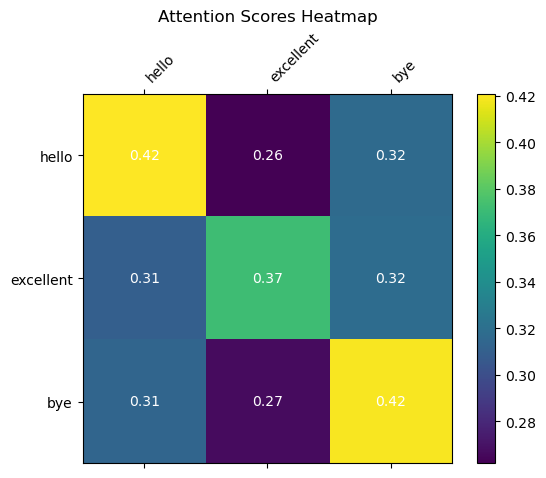

In [104]:
fig, ax = plt.subplots ()
cax = ax.matshow (attn.detach ().numpy (), cmap='viridis')

fig.colorbar (cax)

ax.set_xticks (np.arange (len (words)))
ax.set_yticks (np.arange (len (words)))
ax.set_xticklabels (words)
ax.set_yticklabels (words)

plt.xticks (rotation=45, ha='left')

for i in range (len (words)):
    for j in range (len (words)):
        ax.text(j, i, f'{attn[i, j]:.2f}', va='center', ha='center', color='white')

plt.title('Attention Scores Heatmap')
plt.show()

# simple next digit

In [56]:
def generate_digit_dataset (num_pairs, sequence_length):
    dataset = list ()
    for i in range (num_pairs):
        tensor1 = torch.arange (i + 1, i + 1 + sequence_length) % 9 + 1
        tensor2 = torch.tensor ([(tensor1[-1]) % 9 + 1])
        
        dataset.append((tensor1, tensor2))
    return dataset

In [57]:
num_pairs = 1000
token_len = 10
train_data = generate_digit_dataset (num_pairs, token_len)
test_data = generate_digit_dataset (300, token_len)

In [58]:
class DigitDataset (Dataset):
    def __init__ (self, data):
        self.data = data
    
    def __getitem__ (self, idx):
        return self.data[idx]
    
    def __len__ (self):
        return len (self.data)

In [61]:
train = DataLoader (train_data, batch_size=16, shuffle=True)
test = DataLoader (test_data, batch_size=16, shuffle=True)

In [62]:
x = nn.Linear (3, 128)(torch.tensor ([1, 2, 3]).to (torch.float))
logits = F.softmax (nn.Linear (128, 9)(x), dim=-1)
logits, logits.max (), logits.argmax () + 1

(tensor([0.0559, 0.0162, 0.1099, 0.0331, 0.2971, 0.3577, 0.0436, 0.0399, 0.0465],
        grad_fn=<SoftmaxBackward0>),
 tensor(0.3577, grad_fn=<MaxBackward1>),
 tensor(6))

In [63]:
class DigitNNModel (nn.Module):
    def __init__ (self):
        super (DigitNNModel, self).__init__ ()
        
        self.fc1 = nn.Linear (token_len, 256)
        self.fc2 = nn.Linear (256, 9)
        
    def forward (self, x):
        x = x.to (torch.float)
        x = self.fc1 (x)
        x = self.fc2 (x)
        return x

In [74]:
network = DigitNNModel ()

try:
    network.load_state_dict (torch.load ('nn_next_token.pth'))
except FileNotFoundError:
    pass

In [72]:
criterion = nn.CrossEntropyLoss ()
optimizer = optim.Adam (network.parameters (), lr=0.001)

In [65]:
network (torch.tensor ([[1, 2, 3, 4, 5, 6, 7, 8, 9, 1], [1, 2, 3, 4, 5, 6, 7, 8, 9, 1]])).shape

torch.Size([2, 9])

In [68]:
epochs = 50

for epoch in range (epochs):
    acc_loss = 0.0
    
    for sequences, labels in train:
        optimizer.zero_grad ()
        logits = network (sequences)
        labels = labels.squeeze () - 1
        loss = criterion (logits, labels)
        
        loss.backward ()
        optimizer.step ()
        
        acc_loss += loss.item ()
        
    print (f'epoch ({epoch + 1} / {epochs}), loss: {acc_loss / len (train):.4f}')

print ('Training finished')

epoch (1 / 50), loss: 0.5426
epoch (2 / 50), loss: 0.0202
epoch (3 / 50), loss: 0.0108
epoch (4 / 50), loss: 0.0070
epoch (5 / 50), loss: 0.0049
epoch (6 / 50), loss: 0.0037
epoch (7 / 50), loss: 0.0029
epoch (8 / 50), loss: 0.0023
epoch (9 / 50), loss: 0.0019
epoch (10 / 50), loss: 0.0016
epoch (11 / 50), loss: 0.0014
epoch (12 / 50), loss: 0.0012
epoch (13 / 50), loss: 0.0010
epoch (14 / 50), loss: 0.0009
epoch (15 / 50), loss: 0.0008
epoch (16 / 50), loss: 0.0007
epoch (17 / 50), loss: 0.0007
epoch (18 / 50), loss: 0.0006
epoch (19 / 50), loss: 0.0005
epoch (20 / 50), loss: 0.0005
epoch (21 / 50), loss: 0.0005
epoch (22 / 50), loss: 0.0004
epoch (23 / 50), loss: 0.0004
epoch (24 / 50), loss: 0.0004
epoch (25 / 50), loss: 0.0003
epoch (26 / 50), loss: 0.0003
epoch (27 / 50), loss: 0.0003
epoch (28 / 50), loss: 0.0003
epoch (29 / 50), loss: 0.0002
epoch (30 / 50), loss: 0.0002
epoch (31 / 50), loss: 0.0002
epoch (32 / 50), loss: 0.0002
epoch (33 / 50), loss: 0.0002
epoch (34 / 50), lo

In [77]:
import random

with torch.no_grad ():
    random_index = random.randint (0, len (train_data) - 1)
    input_sequence = train_data[random_index]

    input_tensor = input_sequence[0].detach().unsqueeze(0)

    output = network (input_tensor)
    prediction = output.argmax (dim=-1).item() + 1

    print (f'{input_sequence}, pred: {prediction}, act: {input_sequence[1]}')

(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 1]), tensor([2])), pred: 2, act: tensor([2])


In [78]:
with torch.no_grad ():
    random_index = random.randint (0, len (train_data) - 1)
    input_sequence = train_data[random_index][0].detach ().unsqueeze (0)

    initial_sequence = input_sequence.clone ()

    for _ in range (30):
        input_tensor = initial_sequence.clone ().detach ().unsqueeze (0)
        out = network (input_tensor).argmax (dim=-1).item () + 1
        print(f'{initial_sequence.squeeze (0).tolist ()}: {out}')

        input_tensor = input_tensor[:, 1:]
        initial_sequence = torch.cat ((initial_sequence[:, 1:], torch.tensor ([[out]])), dim=1)

[4, 5, 6, 7, 8, 9, 1, 2, 3, 4]: 5
[5, 6, 7, 8, 9, 1, 2, 3, 4, 5]: 6
[6, 7, 8, 9, 1, 2, 3, 4, 5, 6]: 7
[7, 8, 9, 1, 2, 3, 4, 5, 6, 7]: 8
[8, 9, 1, 2, 3, 4, 5, 6, 7, 8]: 9
[9, 1, 2, 3, 4, 5, 6, 7, 8, 9]: 1
[1, 2, 3, 4, 5, 6, 7, 8, 9, 1]: 2
[2, 3, 4, 5, 6, 7, 8, 9, 1, 2]: 3
[3, 4, 5, 6, 7, 8, 9, 1, 2, 3]: 4
[4, 5, 6, 7, 8, 9, 1, 2, 3, 4]: 5
[5, 6, 7, 8, 9, 1, 2, 3, 4, 5]: 6
[6, 7, 8, 9, 1, 2, 3, 4, 5, 6]: 7
[7, 8, 9, 1, 2, 3, 4, 5, 6, 7]: 8
[8, 9, 1, 2, 3, 4, 5, 6, 7, 8]: 9
[9, 1, 2, 3, 4, 5, 6, 7, 8, 9]: 1
[1, 2, 3, 4, 5, 6, 7, 8, 9, 1]: 2
[2, 3, 4, 5, 6, 7, 8, 9, 1, 2]: 3
[3, 4, 5, 6, 7, 8, 9, 1, 2, 3]: 4
[4, 5, 6, 7, 8, 9, 1, 2, 3, 4]: 5
[5, 6, 7, 8, 9, 1, 2, 3, 4, 5]: 6
[6, 7, 8, 9, 1, 2, 3, 4, 5, 6]: 7
[7, 8, 9, 1, 2, 3, 4, 5, 6, 7]: 8
[8, 9, 1, 2, 3, 4, 5, 6, 7, 8]: 9
[9, 1, 2, 3, 4, 5, 6, 7, 8, 9]: 1
[1, 2, 3, 4, 5, 6, 7, 8, 9, 1]: 2
[2, 3, 4, 5, 6, 7, 8, 9, 1, 2]: 3
[3, 4, 5, 6, 7, 8, 9, 1, 2, 3]: 4
[4, 5, 6, 7, 8, 9, 1, 2, 3, 4]: 5
[5, 6, 7, 8, 9, 1, 2, 3, 4, 5]: 6
[6, 7, 8, 9, 1

In [70]:
# torch.save (network.state_dict (), 'nn_next_token.pth')

# simple next digit (transformer)

In [107]:
num_pairs = 500
sequence_length = 5
sequence_data_train = generate_digit_dataset (num_pairs, sequence_length)
sequence_data_test = generate_digit_dataset (100, sequence_length)

In [108]:
train = DataLoader (sequence_data_train, batch_size=16, shuffle=True)
test = DataLoader (sequence_data_test, batch_size=16, shuffle=True)

In [123]:
@dataclass
class TransformerConfig:
    d_k = None
    def __init__ (self, **kwargs):
        for k, v in kwargs.items ():
            setattr (self, k, v)
        self.d_k = self.d_model // self.n_head

In [110]:
config = TransformerConfig (
    n_head=8,
    n_layer=4,
    vocab_size=10,
    d_model=128,
    seq_len=5,
    epochs=50
)

In [111]:
def get_pos_embds (seq_length, d_model):
    pos_encoding = np.zeros ((seq_length, d_model))
    for pos in range (seq_length):
        for i in range (d_model):
            pos_encoding[pos, i] = pos / (10000 ** ((2 * i) / d_model))
    
    pos_encoding[:, 0::2] = np.sin (pos_encoding[:, 0::2])
    pos_encoding[:, 1::2] = np.cos (pos_encoding[:, 1::2])
    
    return torch.tensor (pos_encoding, dtype=torch.float32)

In [112]:
class SequenceHead (nn.Module):
    def __init__ (self, config: TransformerConfig):
        super (SequenceHead, self).__init__ ()
        
        self.query = nn.Linear (config.d_model, config.d_k, dtype=torch.float32)
        self.key = nn.Linear (config.d_model, config.d_k, dtype=torch.float32)
        self.value = nn.Linear (config.d_model, config.d_k, dtype=torch.float32)
        
    def forward (self, x):
        Q = self.query (x)
        K = self.key (x)
        V = self.value (x)
        
        attn = Q @ K.transpose (-2, -1)
        attn_scale = attn / (config.d_k ** 0.5)
        attn_soft = F.softmax (attn_scale, dim=-1)
        out = attn_soft @ V
        
        return out

In [113]:
class SequenceMultiHeadAttention (nn.Module):
    def __init__(self, config: TransformerConfig):
        super (SequenceMultiHeadAttention, self).__init__()
        self.heads = nn.ModuleList ([SequenceHead(config) for _ in range (config.n_head)])
        self.linear = nn.Linear (config.n_head * config.d_k, config.d_model, dtype=torch.float32)
        
    def forward (self, x):
        head_outputs = [head (x) for head in self.heads]
        out = torch.cat (head_outputs, dim=-1)
        out = self.linear (out)
        return out

class SequenceFeedForward (nn.Module):
    def __init__ (self, config: TransformerConfig):
        super (SequenceFeedForward, self).__init__ ()
        self.network = nn.Sequential (
            nn.Linear (config.d_model, config.d_model * 4, dtype=torch.float32),
            nn.Linear (config.d_model * 4, config.d_model, dtype=torch.float32)
        )
        
    def forward (self, x):
        out = self.network (x)
        return out

In [114]:
class SequenceBlock (nn.Module):
    def __init__ (self, config: TransformerConfig):
        super (SequenceBlock, self).__init__ ()
        
        self.norm1 = nn.LayerNorm (config.d_model, dtype=torch.float32)
        self.norm2 = nn.LayerNorm (config.d_model, dtype=torch.float32)
        self.ff = SequenceFeedForward (config)
        self.mha = SequenceMultiHeadAttention (config)
        
    def forward (self, x):
        x = x + self.norm1 (self.mha (x))
        x = x + self.norm2 (self.ff (x))
        return x

In [115]:
class SequenceTransformer (nn.Module):
    def __init__ (self, config: TransformerConfig):
        super (SequenceTransformer, self).__init__ ()
        
        self.wte = nn.Embedding (config.vocab_size, config.d_model, dtype=torch.float32)
        self.pos = get_pos_embds (config.seq_len, config.d_model)
        
        self.blocks = nn.Sequential (*[SequenceBlock (config) for _ in range (config.n_layer)])
        self.norm = nn.LayerNorm (config.d_model, dtype=torch.float32)
        self.linear = nn.Linear (config.d_model, config.vocab_size - 1, dtype=torch.float32)
        
    def forward (self, x, outputs=None):
        x = x.to (torch.long)
        
        tok_embds = self.wte (x)
        transformer_input = tok_embds + self.pos
        
        out = self.blocks (transformer_input)
        out = self.norm (out)
        logits = self.linear (out)
        
        return logits

In [116]:
transformer = SequenceTransformer (config)

try:
    transformer.load_state_dict (torch.load ('transformer_next_token.pth'))
except FileNotFoundError:
    pass

In [117]:
optimizer = optim.Adam (transformer.parameters (), lr=0.0001)
criterion = nn.CrossEntropyLoss ()

In [118]:
for epoch in range (config.epochs):
    
    total_loss = 0.0
    for inps, labs in train:
        
        optimizer.zero_grad ()
        logits = transformer (inps)
        labs = labs.squeeze () - 1
        
        logits = logits[:, -1, :]
        
        loss = criterion (logits, labs)
        loss.backward ()
        
        optimizer.step ()
        total_loss += loss.item ()
    
    print (f'epoch: ({epoch + 1}/{config.epochs}), loss: {total_loss / len (train):.4f}')

epoch: (1/50), loss: 0.0015
epoch: (2/50), loss: 0.0010
epoch: (3/50), loss: 0.0008
epoch: (4/50), loss: 0.0006
epoch: (5/50), loss: 0.0005
epoch: (6/50), loss: 0.0004
epoch: (7/50), loss: 0.0003
epoch: (8/50), loss: 0.0003
epoch: (9/50), loss: 0.0002
epoch: (10/50), loss: 0.0002
epoch: (11/50), loss: 0.0002
epoch: (12/50), loss: 0.0002
epoch: (13/50), loss: 0.0001
epoch: (14/50), loss: 0.0001
epoch: (15/50), loss: 0.0001
epoch: (16/50), loss: 0.0001
epoch: (17/50), loss: 0.0001
epoch: (18/50), loss: 0.0001
epoch: (19/50), loss: 0.0001
epoch: (20/50), loss: 0.0001
epoch: (21/50), loss: 0.0001
epoch: (22/50), loss: 0.0001
epoch: (23/50), loss: 0.0001
epoch: (24/50), loss: 0.0001
epoch: (25/50), loss: 0.0001
epoch: (26/50), loss: 0.0001
epoch: (27/50), loss: 0.0000
epoch: (28/50), loss: 0.0000
epoch: (29/50), loss: 0.0000
epoch: (30/50), loss: 0.0000
epoch: (31/50), loss: 0.0000
epoch: (32/50), loss: 0.0000
epoch: (33/50), loss: 0.0000
epoch: (34/50), loss: 0.0000
epoch: (35/50), loss: 0

In [119]:
out = transformer (torch.tensor ([
    [1, 2, 3, 4, 5],
    [2, 3, 4, 5, 6],
    [5, 6, 7, 8, 9],
    [6, 7, 8, 9, 1],
]))[:, -1, :]

In [120]:
F.softmax (out, dim=-1).argmax (dim=-1) + 1

tensor([6, 7, 1, 2])

In [122]:
# torch.save (transformer.state_dict (), 'transformer_next_token.pth')

# get future sequence generation

In [207]:
corpus = """
అ, ఆ, ఇ, ఈ, ఉ, ఊ, ఋ, ౠ, ఎ, ఏ, ఐ, ఒ, ఓ, ఔ, అం, అః
""".replace (',', '').replace ('\n', '')

In [232]:
from tokenizers import Tokenizer, models, trainers, pre_tokenizers, decoders, processors

tokenizer = Tokenizer (models.BPE ())
trainer = trainers.BpeTrainer (vocab_size=18)
tokenizer.pre_tokenizer = pre_tokenizers.Whitespace ()

tokenizer.train_from_iterator ([corpus], trainer)
tokenizer.decoder = decoders.BPEDecoder ()

In [259]:
sample_text = "అ ఆ ఇ ఈ ఉ ఊ ఋ ౠ ఎ ఏ ఐ ఒ ఓ ఔ అం అః"
encoded = tokenizer.encode (sample_text)
print (encoded.tokens)
print (encoded.ids)

decoded_text = tokenizer.decode (encoded.ids)
print (decoded_text)

['అ', 'ఆ', 'ఇ', 'ఈ', 'ఉ', 'ఊ', 'ఋ', 'ౠ', 'ఎ', 'ఏ', 'ఐ', 'ఒ', 'ఓ', 'ఔ', 'అం', 'అః']
[2, 3, 4, 5, 6, 7, 8, 15, 9, 10, 11, 12, 13, 14, 16, 17]
అఆఇఈఉఊఋౠఎఏఐఒఓఔఅంఅః


In [272]:
tokens = encoded.tokens
token_indices = encoded.ids

In [327]:
len (tokens)

16

In [378]:
t_config = TransformerConfig (
    n_head=8,
    n_layer=4,
    # add one because transformer arch negates one in the last projection
    vocab_size=16 + 1, 
    d_model=128,
    seq_len=1,
    epochs=50
)

In [379]:
def generate_telugu_dataset (num_pairs, sequence_length=5):
    dataset = list ()
    for i in range (num_pairs):
        start_index = i % len (token_indices)
        tensor1 = torch.tensor ([token_indices[start_index]], dtype=torch.int32)
    
        end_index = (start_index + sequence_length) % len (token_indices)
        
        if end_index > start_index:
            tensor2 = torch.tensor (token_indices[start_index + 1:end_index + 1], dtype=torch.int32)
        else:
            tensor2 = torch.cat ((torch.tensor (token_indices[start_index + 1:], dtype=torch.int32),
                                 torch.tensor (token_indices[:end_index + 1], dtype=torch.int32)), dim=0)
        
        dataset.append ((tensor1, tensor2))
    
    return dataset

In [380]:
num_pairs = 20
telugu_dataset_example = generate_telugu_dataset (num_pairs)

for i in range (num_pairs):
    tok = telugu_dataset_example[i]
    print (tokenizer.decode (tok[0].detach ().numpy ()), tokenizer.decode (tok[1].detach ().numpy ()))

అ ఆఇఈఉఊ
ఆ ఇఈఉఊఋ
ఇ ఈఉఊఋౠ
ఈ ఉఊఋౠఎ
ఉ ఊఋౠఎఏ
ఊ ఋౠఎఏఐ
ఋ ౠఎఏఐఒ
ౠ ఎఏఐఒఓ
ఎ ఏఐఒఓఔ
ఏ ఐఒఓఔఅం
ఐ ఒఓఔఅంఅః
ఒ ఓఔఅంఅఃఅ
ఓ ఔఅంఅఃఅఆ
ఔ అంఅఃఅఆఇ
అం అఃఅఆఇఈ
అః అఆఇఈఉ
అ ఆఇఈఉఊ
ఆ ఇఈఉఊఋ
ఇ ఈఉఊఋౠ
ఈ ఉఊఋౠఎ


In [381]:
train_pairs = 300
test_pairs = 50
telugu_train = generate_telugu_dataset (train_pairs)
telugu_test = generate_telugu_dataset (test_pairs)

In [382]:
train = DataLoader (telugu_train, batch_size=16, shuffle=True)
test = DataLoader (telugu_test, batch_size=16, shuffle=True)

In [383]:
for inps, labs in train:
    print (inps.shape, labs.shape)
    break

torch.Size([16, 1]) torch.Size([16, 5])


In [384]:
t = SequenceTransformer (t_config)

In [386]:
for inps, labs in train:
    a = inps
    b = labs

In [432]:
out = t (a)

In [435]:
criterion = nn.CrossEntropyLoss ()

In [436]:
criterion (out.squeeze (), b[:, 0])

RuntimeError: expected scalar type Long but found Float

In [99]:
class ORNetwork (nn.Module):
    def __init__ (self):
        super (ORNetwork, self).__init__ ()
        
        self.net = nn.Linear (2, 1, bias=False)
        self.net.weight.data = torch.tensor ([[1., 1.]])
        
    def forward (self, x):
        return self.net (x) >= 1

In [100]:
class ANDNetwork (nn.Module):
    def __init__ (self):
        super (ANDNetwork, self).__init__ ()
        
        self.net = nn.Linear (2, 1, bias=False)
        self.net.weight.data = torch.tensor ([[1., 1.]])
        
    def forward (self, x):
        return self.net (x) >= 2

In [101]:
andnet = ANDNetwork ()
ornet = ORNetwork ()

In [102]:
andnet (torch.tensor ([1.0, 1.0]))

tensor([True])

In [103]:
for i in range (2):
    for j in range (2):
        print (f'{i} {j} {andnet (torch.tensor ([[i, j]]).to (torch.float)).detach ().numpy ()[0][0]}')

0 0 False
0 1 False
1 0 False
1 1 True


In [104]:
for i in range (2):
    for j in range (2):
        print (f'{i} {j} {ornet (torch.tensor ([[i, j]]).to (torch.float)).detach ().numpy ()[0][0]}')

0 0 False
0 1 True
1 0 True
1 1 True


# model testing

In [4]:
@dataclass
class ViTConfig:
    def __init__ (self, **kwargs):
        for k, v in kwargs.items ():
            setattr (self, k, v)
            
        self.d_k = self.d_model // self.n_head
        self.tok_len = self.patch_size ** 2

        # add one bacuause of the prediction token
        self.seq_len = (self.h_image // self.patch_size) * (self.w_image // self.patch_size) + 1
        
class PatchTokenizer (nn.Module):
    def __init__ (self, config: ViTConfig):
        super (PatchTokenizer, self).__init__ ()

        self.windows = nn.Unfold (kernel_size=config.patch_size, stride=config.patch_size, padding=0)

        # projection for converting into the required dimention using nn.Linear ()
        self.project = nn.Linear ((config.patch_size ** 2), config.tok_len)

    def forward (self, x):
        # transpose for multiplying (a, b) with (b, a)
        x = self.windows (x).transpose (1, 2)
        x = self.project (x)
        return x
    
class LearnablePositionalEncoder (nn.Module):
    def __init__ (self, config: ViTConfig):
        super (LearnablePositionalEncoder, self).__init__ ()
        self.pos_encoding = nn.Parameter (torch.zeros (1, config.seq_len, config.tok_len), requires_grad=True)

    def forward (self, x):
        out = self.pos_encoding + x
        return out

class Head (nn.Module):
    def __init__ (self, config: ViTConfig):
        super (Head, self).__init__ ()

        self.query = nn.Linear (config.d_model, config.d_k)
        self.key = nn.Linear (config.d_model, config.d_k)
        self.value = nn.Linear (config.d_model, config.d_k)

        self.linear = nn.Linear (config.d_k, config.d_k)
        
    def forward (self, x):

        # x.shape (batch, seq_len, d_model)
        B, T, D = x.shape

        Q = self.query (x)
        K = self.key (x)
        V = self.value (x)

        attn = Q @ K.permute (0, 2, 1)
        attn = attn / (config.d_k ** (1 / 2))
        attn = F.softmax (attn, dim=-1)
        
        out = (attn @ V)
        out = self.linear (out)

        return out
    
class Attention (nn.Module):
    def __init__ (self, config: ViTConfig):
        super (Attention, self).__init__ ()

        self.heads = nn.ModuleList ([Head (config) for _ in range (config.n_head)])
        self.linear = nn.Linear (config.n_head * config.d_k, config.d_model)
        
    def forward (self, x):
        out = torch.cat ([head (x) for head in self.heads], dim=-1)
        out = self.linear (out)

        return out
    
class FeedForward (nn.Module):
    def __init__ (self, config: ViTConfig):
        super (FeedForward, self).__init__ ()

        self.norm = nn.LayerNorm (config.d_model)
        self.fc1 = nn.Linear (config.d_model, config.d_model * config.chan_mul)
        self.fc2 = nn.Linear (config.d_model * config.chan_mul, config.d_model)
        self.activation = nn.GELU ()

    def forward (self, x):
        x = self.norm (x)
        x = self.fc1 (x)
        x = self.activation (x)
        out = self.fc2 (x)

        return out
    
class Encoder (nn.Module):
    def __init__ (self, config: ViTConfig):
        super (Encoder, self).__init__ ()

        self.norm1 = nn.LayerNorm (config.d_model)
        self.norm2 = nn.LayerNorm (config.d_model)

        self.attention = Attention (config)
        self.feed_forward = FeedForward (config)

    def forward (self, x):
        x = x + self.attention (self.norm1 (x))
        x = x + self.feed_forward (self.norm2 (x))
        return x
    
class ViT (nn.Module):
    def __init__ (self, config: ViTConfig):
        super (ViT, self).__init__ ()

        self.wpe = LearnablePositionalEncoder (config)
        self.cls = nn.Parameter (torch.zeros (1, 1, config.tok_len), requires_grad=True)
        self.project = nn.Linear (config.tok_len, config.d_model)

        self.blocks = nn.Sequential (*[Encoder (config) 
                                       for _ in range (config.n_layer)])

        self.linear = nn.Linear (config.d_model, 2)
        self.norm = nn.LayerNorm (config.d_model)

    def forward (self, x):
        B, T, D = x.shape

        x = torch.cat ((self.cls.expand (B, -1, -1), x), dim=1)
        x = self.wpe (x)
        x = self.project (x)

        out = self.blocks (x)
        out = out[:, 0]
        out = self.norm (out)
        logits = self.linear (out)

        return logits
    
class ViTModel (nn.Module):
    def __init__ (self, config: ViTConfig):
        super (ViTModel, self).__init__ ()

        self.patch_tokens = PatchTokenizer (config)
        self.vit = ViT (config)

    def forward (self, x):
        # x (C, H, W)
        x = self.patch_tokens (x) # x (B, T, D)
        logits = self.vit (x)

        return logits

In [5]:
!ls vit-models

KViT61A40E.pth    KViT63A35E.pth    KViT64A25ESGD.pth


In [7]:
H, W = 224, 224

In [24]:
config = ViTConfig (
    n_head=8,
    n_layer=6,
    d_model=768,
    h_image=H,
    w_image=W,
    epochs=35,
    patch_size=16,
    chan_mul=4,
    batch_size=8
)

In [25]:
vit = ViTModel (config)

In [26]:
vit.load_state_dict (
    torch.load (
        os.path.join ('vit-models', 'KViT63A35E.pth'), map_location=torch.device ('cpu')
    )
)

<All keys matched successfully>

In [27]:
def calculate_accuracy (model, dataloader, device):
    model.eval ()
    correct = 0
    total = 0
    
    with torch.no_grad ():
        for images, labels in dataloader:
            images = images.to (device)
            labels = labels.to (device)

            logits = model (images)
            _, predicted = torch.max (logits, dim=1)
            
            correct += (predicted == labels).sum ().item ()
            total += labels.size (0)
    
    accuracy = correct / total if total > 0 else 0.0
    return accuracy

In [30]:
class CatDogDataset (Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = list ()
        self.labels = list ()

        for label, class_name in enumerate(['cats', 'dogs']):
            class_dir = os.path.join(root_dir, class_name)
            for file_name in os.listdir(class_dir):
                if file_name[0] == '.':
                    continue

                self.image_paths.append(os.path.join(class_dir, file_name))
                self.labels.append(label)

    def __len__(self):
        return len (self.labels)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('L')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

In [31]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
    
cat_dog = CatDogDataset (os.path.join ('vit-cat-dog'), transform=transform)

In [34]:
train_size = int (0.8 * len (cat_dog))
test_size = len (cat_dog) - train_size
train_dataset, test_dataset = random_split (cat_dog, [train_size, test_size])

In [35]:
train = DataLoader (train_dataset, batch_size=config.batch_size, shuffle=True)
test = DataLoader (test_dataset, batch_size=config.batch_size, shuffle=False)

In [36]:
calculate_accuracy (vit, train, torch.device ('cpu'))

0.7868270862255129

In [37]:
calculate_accuracy (vit, test, torch.device ('cpu'))

0.7754472547809994

In [51]:
path = os.path.join ("vit-cat-dog", "cats", 'cat2.jpg')
image = Image.open (path)

transform = transforms.Compose ([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

img = transform (image)

In [54]:
F.softmax (vit (img.unsqueeze (0)), dim=-1).argmax ()

tensor(0)

In [49]:
F.softmax (vit (dog.unsqueeze (0)), dim=-1).argmax ()

tensor(1)